<a href="https://colab.research.google.com/github/BrighamData/WhatsApp-Chat-Analyzer/blob/main/Whatsapp_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Whatsapp Chatlog Analyser**

# 1) IMPORTS AND SETUP


In [34]:
# !pip install emoji

import os
import re
import IPython
import calendar
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
# from emoji.core import emojize
from io import StringIO
from collections import defaultdict
from google.colab import files

def chatsplt(txt):
  chatsplit = re.split('(\[\d\d?/\d\d?/\d\d, \d\d?:\d\d:\d\d \w\w\])', txt)
  chatsplit.pop(0)
  chatsplit = [i.replace('\n', '') for i in chatsplit]
  chatsplit = [i.replace('\u200e', '') for i in chatsplit]
  return chatsplit

def convert(lst):
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct

# Upload Chat File

In [4]:
uploaded = files.upload()
uploaded = list(uploaded.keys())
assert len(uploaded) == 1
os.rename(uploaded[0], 'chat.txt')

Saving _chat.txt to _chat.txt


In [5]:
text = open('/content/chat.txt').read()

chatdict = convert(chatsplt(text))

s = pd.Series(chatdict, name='Message')
s.index.name = 'Date'
df = s.to_frame()
df = df.reset_index()
df['Date'] = df['Date'].map(lambda x: x.lstrip('[').rstrip(']'))
df[['Sender', 'Message']] = df['Message'].str.split(': ', n=1, expand=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = [i.time() for i in df['Date']]
df['Date'] = [i.date() for i in df['Date']]
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df.Date.dt.day_name()
df = df[['Date','Day', 'Time', 'Sender', 'Message']]

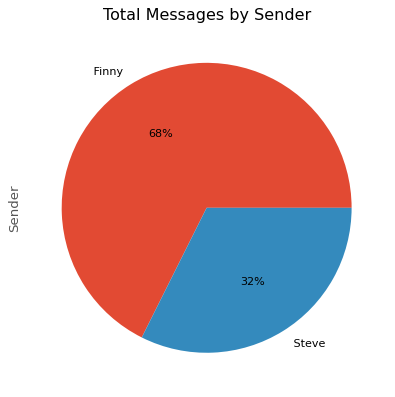

In [9]:
plt.style.use('ggplot')

plt.figure(figsize=(8,6), dpi = 80)
ax = df.Sender.value_counts().plot(kind='pie', autopct='%1.0f%%')
ax.set_title("Total Messages by Sender")
plt.show()

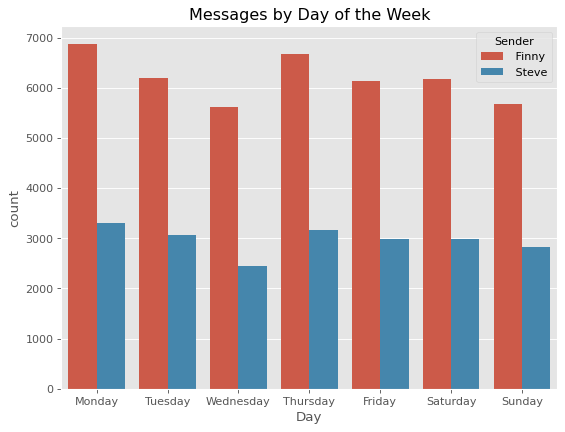

In [62]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (8, 6), dpi = 80)
ax = fig.add_subplot()
ax.set_title("Messages by Day of the Week")
sns.countplot(x = 'Day', data = df, hue = 'Sender',  order = calendar.day_name)
plt.show()

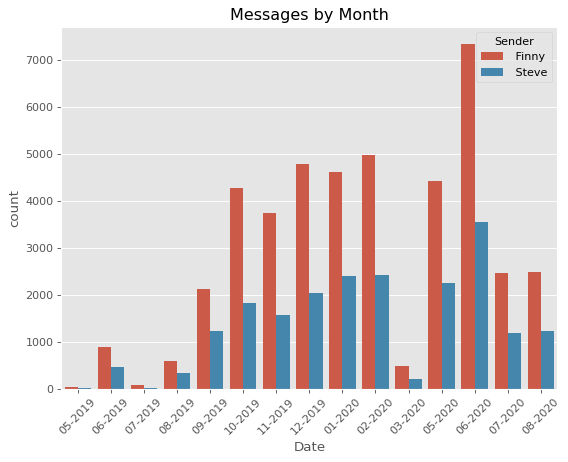

In [64]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (8, 6), dpi = 80)
ax = fig.add_subplot()
ax.set_title("Messages by Month")
ax.tick_params(axis='x', labelrotation=45)
sns.countplot(x = df['Date'].dt.strftime('%m-%Y'), data = df, hue = 'Sender')
plt.show()
